<a href="https://colab.research.google.com/github/dey-hritam/ML-Projects/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q gradio
import gradio as gr
import numpy as np
import tensorflow as tf
from keras.layers import Dense,Flatten,Softmax
import matplotlib.pyplot as plt
import random
from keras.models import Sequential

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 7.9 MB/s eta 0:

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


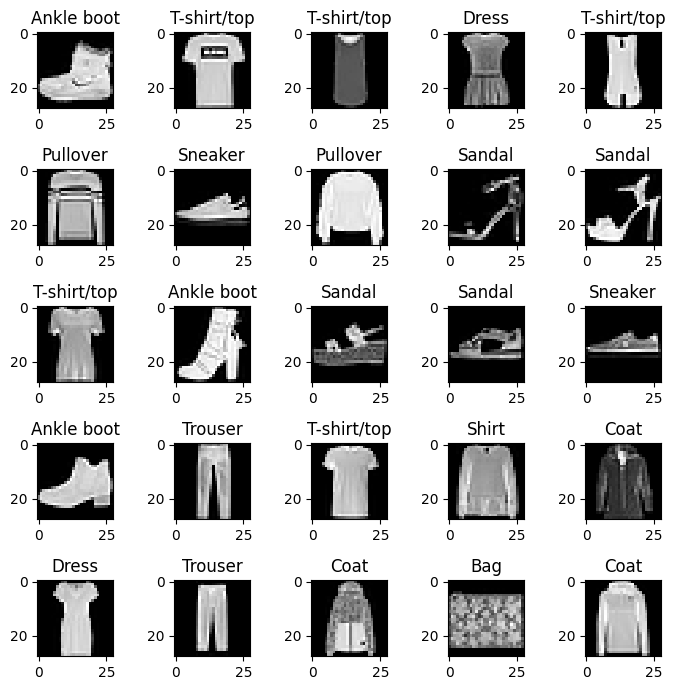

In [ ]:
plt.rcParams['figure.figsize']=(7,7)
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title(class_names[y_train[i]])


plt.tight_layout()

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28), name="L0"),
    Dense(200, activation='relu', name="L1"),
    Dense(80, activation='relu', name="L2"),
    Dense(10, activation='linear', name="L3")
])



In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

model.fit(x_train,y_train,batch_size=128,epochs=15,verbose=1)

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.5297 - accuracy: 0.8106
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3866 - accuracy: 0.8591
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3624 - accuracy: 0.8685
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3380 - accuracy: 0.8780
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3297 - accuracy: 0.8788
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3224 - accuracy: 0.8815
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.3129 - accuracy: 0.8847
Epoch 8/15
469/469 [==============================] - 3s 6ms/step - loss: 0.3173 - accuracy: 0.8843
Epoch 9/15
469/469 [==============================] - 3s 7ms/step - loss: 0.3060 - accuracy: 0.8876
Epoch 10/15
469/469 [==============================] - 3s 6ms/step - loss: 0.3003 - accuracy: 0.8907

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L0 (Flatten)                (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 200)               157000    
                                                                 
 L2 (Dense)                  (None, 80)                16080     
                                                                 
 L3 (Dense)                  (None, 10)                810       
                                                                 
Total params: 173,890
Trainable params: 173,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(f"test-loss:{test_loss}")
print(f"test-accuracy:{test_acc}")

313/313 - 0s - loss: 0.3863 - accuracy: 0.8700 - 434ms/epoch - 1ms/step
test-loss:0.3862874507904053
test-accuracy:0.8700000047683716


In [ ]:
fashion_model=Sequential([model,Softmax()])
predictions=fashion_model.predict(x_test)

313/313 [==============================] - 0s 999us/step


In [ ]:
def plot_image(i,predictions_array,true_label,img):
  true_label,img=true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)

  if predicted_label==true_label :
    color='blue'
  else :
    color='red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_Array(i,predictions_array,true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


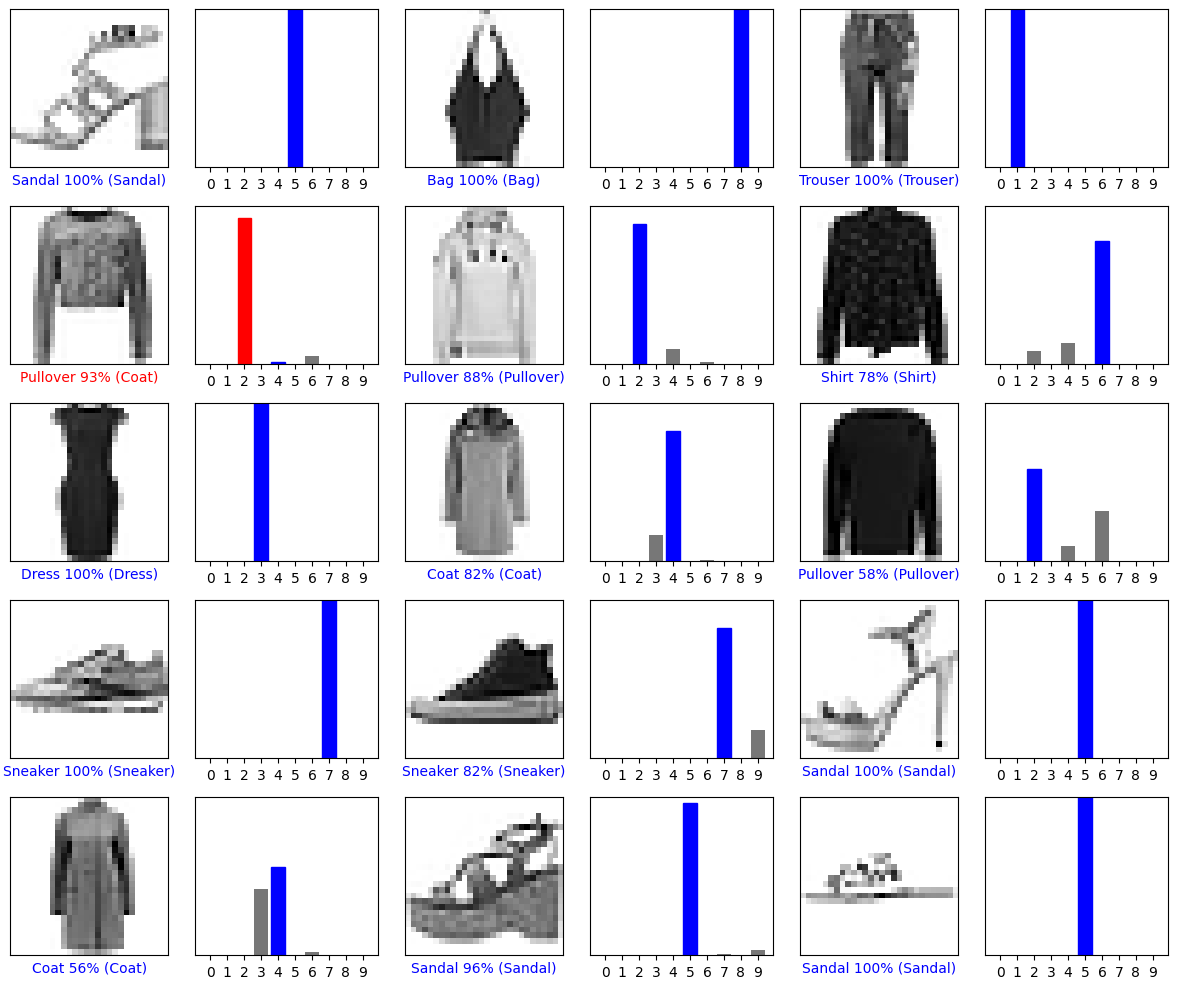

In [ ]:
num_rows=5
num_cols=3
num_img=num_rows * num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_img):
  n=random.randint(0,len(x_test))
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(n,predictions[n],y_test,x_test)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_Array(n,predictions[n],y_test)

plt.tight_layout()

plt.show()

In [ ]:
import gradio as gr

def classify(image):
    image = image.reshape(1, 784) / 255.0
    prediction = fashion_model.predict(image)[0]
    return {str(i): prediction[i] for i in range(10)}

inputs = gr.inputs.Image(shape=(28, 28))
outputs = gr.outputs.Label(num_top_classes=3)
title = "Fashion Style Classifier"
description = "Discover the fashion style of clothing items using AI! Upload an image and see the top predicted fashion classes."

demo = gr.Interface(fn=classify, inputs=inputs, outputs=outputs, title=title, description=description, live=True)
demo.launch(debug=True, share=True)  # Set debug and share to False






<ipython-input-13-488ef525b2cf>:8: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs = gr.inputs.Image(shape=(28, 28))
<ipython-input-13-488ef525b2cf>:8: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs = gr.inputs.Image(shape=(28, 28))
<ipython-input-13-488ef525b2cf>:9: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs = gr.outputs.Label(num_top_classes=3)
<ipython-input-13-488ef525b2cf>:9: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  outputs = gr.outputs.Label(num_top_classes=3)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>